In [7]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

# Generate some sparse data to play with

In [8]:
np.random.seed(42)
n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0 # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, Y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, Y_test = X[n_samples //  2:], y[n_samples // 2:]

# Lasso

In [9]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

Y_pred_lasso = lasso.fit(X_train, Y_train).predict(X_test)
r2_score_lasso = r2_score(Y_test, Y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.658064


# ElasticNet

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.642515


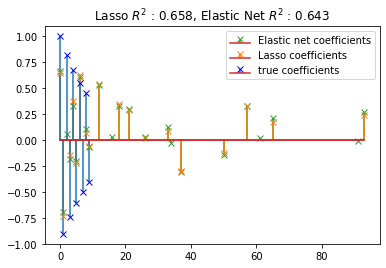

In [10]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio = 0.7)

Y_pred_enet = enet.fit(X_train, Y_train).predict(X_test)
r2_score_enet = r2_score(Y_test, Y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                  markerfmt='x', label='Elastic net coefficients',
                  use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients',
                   use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
        markerfmt='bx', use_line_collection=True)
plt.legend(loc='best')
plt.title("Lasso $R^2$ : %.3f, Elastic Net $R^2$ : %.3f" % (r2_score_lasso, r2_score_enet))
plt.show()